# Loading the data

In [12]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import sklearn

data_dir='./dataset/'

In [2]:
df = pd.read_csv(data_dir+'train.csv')

In [3]:
df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [4]:
print ("The Columns:", df.columns.values)

The Columns: ['id' 'comment_text' 'toxic' 'severe_toxic' 'obscene' 'threat' 'insult'
 'identity_hate']


In [5]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
target_columns = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
for col in target_columns:
    print (col, "\tunique values:", df[col].unique() )


toxic 	unique values: [0 1]
severe_toxic 	unique values: [0 1]
obscene 	unique values: [0 1]
threat 	unique values: [0 1]
insult 	unique values: [0 1]
identity_hate 	unique values: [0 1]


## Data shapes

In [33]:
print (f"df.shape={df.shape}")

df.shape=(159571, 8)


In [34]:
for col in target_columns:
    print (col, df[col].sum())

toxic 15294
severe_toxic 1595
obscene 8449
threat 478
insult 7877
identity_hate 1405


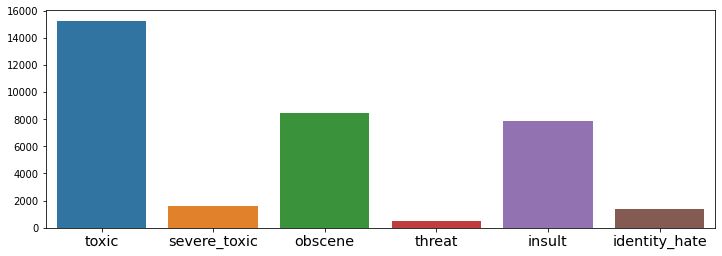

In [35]:
class_sum = [df[col].sum() for col in target_columns]

fig, ax = plt.subplots(1,1, figsize=(12,4))
sns.barplot(x=target_columns, y=class_sum, ax=ax)
ax.set_xticklabels(target_columns, fontsize='x-large');

There appears to be a huge class imbalance. Don't worry too much about it at the moment. Work on some models first and come back to see if we can do something about it.

## Text processing

In [86]:
bb=[bool(i) for i in [1, 1, 0, 0, 0, 0] ]
bb, target_columns

([True, True, False, False, False, False],
 ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])

In [87]:
", ".join(np.array(target_columns)[np.array(bb)])


'toxic, severe_toxic'

In [74]:
np.array([1,2,3,4])[np.array([True, True, False, False])]

array([1, 2])

In [67]:
target_columns[bb]

TypeError: list indices must be integers or slices, not list

In [89]:
print ("Some random texts with their labels.")

np.random.seed(8848)

for i in np.random.randint(0, 100000, 1):
    print (df['comment_text'].values[i])
    print ("labels:", ",".join(np.array(target_columns)[np.array(df[target_columns].values[i])]))

Some random texts with their labels.
Wikipedblack people are stupid ia
labels: severe_toxic,toxic,toxic,toxic,toxic,toxic


# Most common words

In [11]:
import seaborn as sns

In [12]:
sns.barplot??